<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Importing all the libraries we might need and setting the random seed to 0
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np
import sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import pandas
import plotly.graph_objects as go
import sys
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *

# Setting random seed to 0
np.random.seed(0)

Question 1

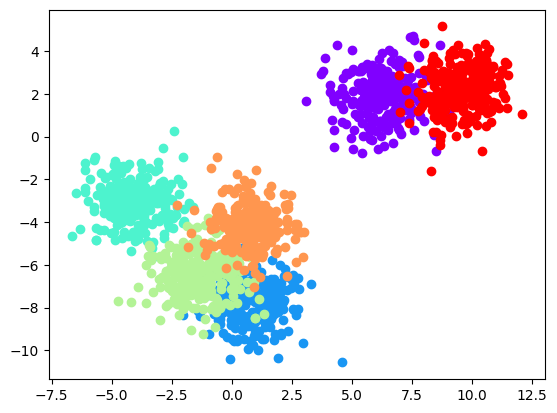

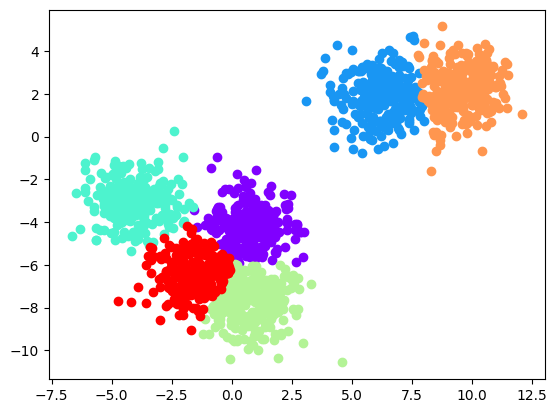

In [32]:
# Generating the test data
X, y = make_blobs(1500, cluster_std = 1, centers = 6)

# Setting up a k means cluster algorithm
km = KMeans(6)

predictions = km.fit_predict(X)

# Plotting
fig1, ax1 = plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, 6))
for i in range(0, 6):
  plt.scatter(X[y==i, 0], X[y==i, 1], color = colors[i])

fig2, ax2 = plt.subplots()
for i in range(0, 6):
  plt.scatter(X[predictions==i, 0], X[predictions==i, 1], color = colors[i])

Above we have generated a clustered dataset and then used the kmeans algorithm to create a classifier for the data.

Question 2

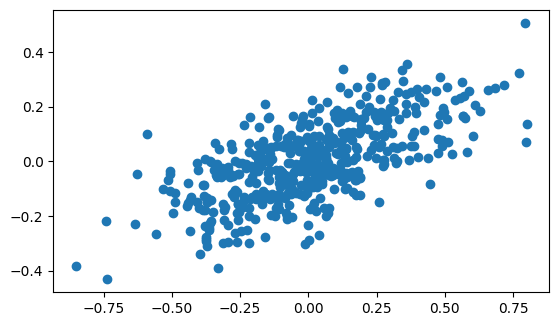

In [29]:
# Importing the function to generate a covariance matrix
def get_cov(sdx = 1, sdy = 1, rotangdeg = 0):
  # Adding the standard deviation squared values to the covariance matrix
  covar = np.array([[sdx**2, 0], [0, sdy**2]])
  # Converting the units of the rotation angle
  rot_ang = (rotangdeg / 360) * 2 * np.pi
  # Writing the rotation matrix
  rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

  # rotating the covar values
  covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
  return covar

# Generating the covariance matrix we need
covar = get_cov(0.3, 0.1, 23)
# Generating the dataset using this
Norm = np.random.multivariate_normal([0, 0], covar, size = 500)

# Plotting the dataset
fig3, ax3 = plt.subplots()
plt.scatter(Norm[:, 0], Norm[:, 1])
ax3.set_aspect('equal', 'box')

Above we have generated a multivariate normal distributed rotated by 23 degrees and then plotted.

In [37]:
# Performing principal component analysis
pca = PCA(2)
pca.fit(Norm)

# Plotting lines of the PCA components
a = pca.components_